# **K-Fold**

In [2]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
model = LogisticRegression()
kf = KFold(n_splits=10)


In [3]:
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = data.drop('target', axis=1)
y = data['target']

In [7]:
cv_scores = cross_val_score(model, X, y, cv=kf)
cv_scores = np.round(cv_scores, 4)
print("Cross validation Scores are:")
for cv_score in cv_scores:
    print(cv_score)
print("Average Score Validation:", np.mean(cv_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross validation Scores are:
0.8738
0.8835
0.8544
0.8544
0.8252
0.9314
0.7843
0.8235
0.7745
0.8039
Average Score Validation: 0.8408900000000001


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **Stratified Cross Validation**

In [8]:
from sklearn.model_selection import StratifiedKFold

In [9]:
skfold_validator = StratifiedKFold(n_splits=10)
skcv_result = cross_val_score(model, X, y, cv=skfold_validator)
skcv_result

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.86407767, 0.90291262, 0.85436893, 0.82524272, 0.84466019,
       0.90196078, 0.80392157, 0.82352941, 0.7745098 , 0.80392157])

In [ ]:
print("stra ")

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
parameter = {'max_depth': [10,50,60],'criterion':['gini','entropy'],'n_estimators':[50,100,200]}

In [12]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter, cv=5, scoring = 'accuracy', verbose=2, n_jobs=-1)

In [24]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameter, verbose=2, n_jobs=-1, n_iter=18)

In [17]:
grid_result = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [25]:
random_result = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [22]:
print('best params:', grid_result.best_params_)
print('best score:', grid_result.best_score_)

best params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100}
best score: 0.9841463414634146


In [26]:
print('best params:', random_result.best_params_)
print('best score:', random_result.best_score_)

best params: {'n_estimators': 50, 'max_depth': 50, 'criterion': 'entropy'}
best score: 0.9817073170731707


In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [31]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict_proba(X_test)[:, 1]

In [33]:
lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_proba)
lr_roc_auc = auc(lr_fpr, lr_tpr)


dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
dt_roc_auc = auc(dt_fpr, dt_tpr)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

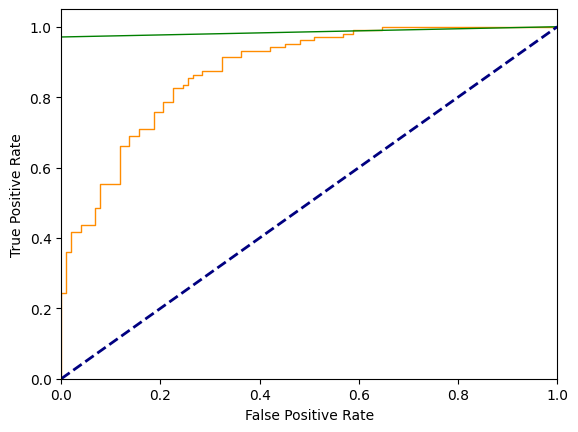

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', lw=1, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='green', lw=1, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt
